<a href="https://colab.research.google.com/github/nagaraju-urakonda/data-analysis-python/blob/main/vechile_image_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import zipfile
import os

# Step 1: Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define base directory inside Google Drive
base_dir = "/content/drive/MyDrive/archive (30)/Vehicles"  # Change this path as needed

# Get all categories dynamically
categories = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]

# Create dictionary of folder paths
paths = {category: os.path.join(base_dir, category) for category in categories}

# Print folder paths
for category, path in paths.items():
    print(f"{category}: {path}")

Motorcycles: /content/drive/MyDrive/archive (30)/Vehicles/Motorcycles
Cars: /content/drive/MyDrive/archive (30)/Vehicles/Cars
Auto Rickshaws: /content/drive/MyDrive/archive (30)/Vehicles/Auto Rickshaws
Ships: /content/drive/MyDrive/archive (30)/Vehicles/Ships
Bikes: /content/drive/MyDrive/archive (30)/Vehicles/Bikes
Trains: /content/drive/MyDrive/archive (30)/Vehicles/Trains
Planes: /content/drive/MyDrive/archive (30)/Vehicles/Planes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Define labels
labels = ["Auto Rickshaws", "Bikes", "Cars", "Motorcycles", "Planes", "Ships", "Trains"]

# Initialize lists
X = []
y = []
img_size = 224

# Loop through each label folder
for label in labels:
    folder_path = os.path.join(base_dir, label)  # Corrected path
    if not os.path.exists(folder_path):
        print(f"Warning: {folder_path} not found!")  # Handle missing folders
        continue

    # Loop through each image in the folder
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)

        try:
            img = Image.open(img_path)
            img = img.convert("RGB")
            img = img.resize((img_size, img_size))  # Resize to (224, 224)
            X.append(np.array(img))  # Convert to NumPy array
            y.append(label)  # Append corresponding label
        except Exception as e:
            print(f"Error processing {img_path}: {e}")  # Handle errors in image processing

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

In [ ]:
print("X : " , X.shape)
print("y : " , y.shape)

X :  (5610, 224, 224, 3)
y :  (5610,)


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size = 0.2 , random_state = 42)


In [ ]:
X_train.shape


(4488, 224, 224, 3)

In [ ]:
y_train.shape


(4488,)

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
datagen = ImageDataGenerator(
    rescale = 1 / 255 ,
    rotation_range = 90 ,
    zoom_range = 0.2 ,
    width_shift_range = 0.2 ,
    height_shift_range = 0.2 ,
    horizontal_flip = True ,
)

In [ ]:
datagen.fit(X_train)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

# First Conv Layer - Increased filters for better feature extraction
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second Conv Layer - Increased filters
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Third Conv Layer - Added another layer to improve feature extraction
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully Connected Layers - Increased neurons for better classification
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))

# Output Layer (7 classes)
model.add(Dense(7, activation="softmax"))

# Compile Model
learning_rate = 0.0005  # Reduced learning rate for better convergence
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Print Model Summary
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,825,223 (98.52 MB)

 Trainable params: 25,825,223 (98.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train , y_train , epochs = 5, batch_size = 32 , validation_data = (X_test , y_test) )

Epoch 1/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.3868 - loss: 46.5193 - val_accuracy: 0.7308 - val_loss: 0.8088
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - accuracy: 0.8308 - loss: 0.5174 - val_accuracy: 0.7460 - val_loss: 0.8192
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.9372 - loss: 0.2154 - val_accuracy: 0.7620 - val_loss: 0.8773
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.9503 - loss: 0.1571 - val_accuracy: 0.7086 - val_loss: 1.3820
Epoch 5/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.9676 - loss: 0.0915 - val_accuracy: 0.7683 - val_loss: 1.4120


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate model and get test accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot ground truth to labels



36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7828 - loss: 1.2935
Test accuracy: 0.7683
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


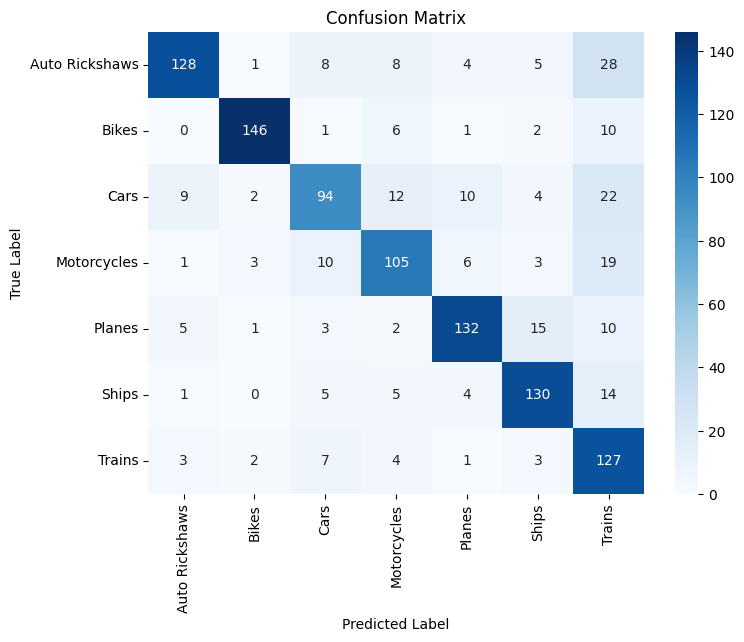

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=labels))


Classification Report:
                precision    recall  f1-score   support

Auto Rickshaws       0.87      0.70      0.78       182
         Bikes       0.94      0.88      0.91       166
          Cars       0.73      0.61      0.67       153
   Motorcycles       0.74      0.71      0.73       147
        Planes       0.84      0.79      0.81       168
         Ships       0.80      0.82      0.81       159
        Trains       0.55      0.86      0.67       147

      accuracy                           0.77      1122
     macro avg       0.78      0.77      0.77      1122
  weighted avg       0.79      0.77      0.77      1122



In [ ]:
# Z-test for model accuracy vs baseline accuracy (90%)
n = len(y_test)  # Number of test samples
baseline_accuracy = 0.90  # Hypothetical baseline (e.g., 90%)
alpha = 0.05  # Significance level

z_score = (test_acc - baseline_accuracy) / np.sqrt((baseline_accuracy * (1 - baseline_accuracy)) / n)
p_value_z = 2 * (1 - norm.cdf(abs(z_score)))  # Two-tailed test

print(f"Z-test Results:")
print(f"----------------")
print(f"Z-score: {z_score:.4f}")
print(f"P-value: {p_value_z:.4f}")

if p_value_z < alpha:
    print("Conclusion: We reject the null hypothesis (H₀). The model's accuracy is significantly different from the baseline accuracy (90%).")
else:
    print("Conclusion: We accept the null hypothesis (H₀). There is no significant difference between the model's accuracy and the baseline.")

# T-test for model accuracy vs baseline accuracy (90%)
sample_accuracies = np.random.binomial(n, test_acc, size=30) / n  # Simulated accuracies from binomial distribution
t_stat, p_value_t = ttest_1samp(sample_accuracies, baseline_accuracy)

print(f"T-test Results:")
print(f"----------------")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value_t:.4f}")

if p_value_t < alpha:
    print("Conclusion: We reject the null hypothesis (H₀). The model's accuracy is significantly different from the baseline accuracy (90%).")
else:
    print("Conclusion: We accept the null hypothesis (H₀). There is no significant difference between the model's accuracy and the baseline.")


Z-test Results:
----------------
Z-score: -14.7081
P-value: 0.0000
Conclusion: We reject the null hypothesis (H₀). The model's accuracy is significantly different from the baseline accuracy (90%).
T-test Results:
----------------
T-statistic: -52.7110
P-value: 0.0000
Conclusion: We reject the null hypothesis (H₀). The model's accuracy is significantly different from the baseline accuracy (90%).


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


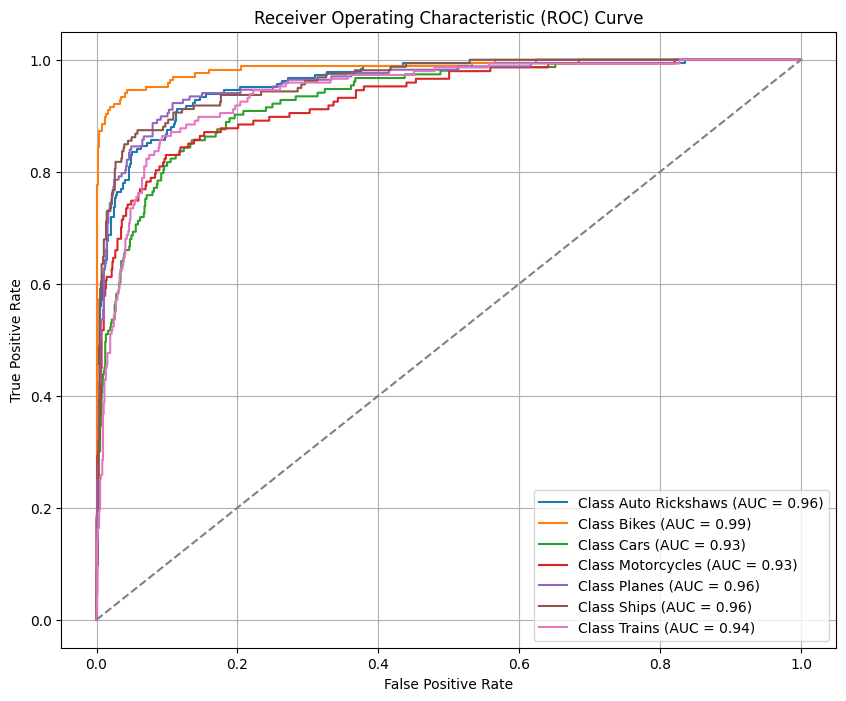

Classification Report:
                precision    recall  f1-score   support

Auto Rickshaws       0.87      0.70      0.78       182
         Bikes       0.94      0.88      0.91       166
          Cars       0.73      0.61      0.67       153
   Motorcycles       0.74      0.71      0.73       147
        Planes       0.84      0.79      0.81       168
         Ships       0.80      0.82      0.81       159
        Trains       0.55      0.86      0.67       147

      accuracy                           0.77      1122
     macro avg       0.78      0.77      0.77      1122
  weighted avg       0.79      0.77      0.77      1122



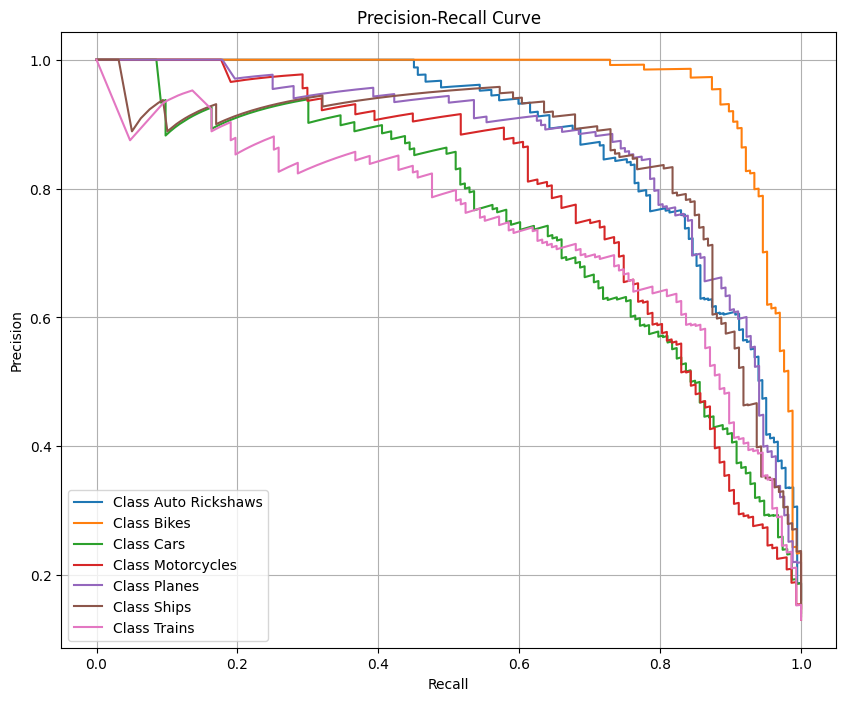

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Binarize the labels for multi-class classification
y_test_bin = label_binarize(y_test, classes=np.arange(len(labels)))
y_pred_prob = model.predict(X_test)  # Get the predicted probabilities for each class

# Initialize variables
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and AUC for each class
for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for all classes
plt.figure(figsize=(10, 8))
for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f'Class {labels[i]} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line (chance level)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Add labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Calculate the classification report for detailed metrics (precision, recall, f1-score)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=labels))

# Plotting precision-recall curve
from sklearn.metrics import precision_recall_curve

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(labels)):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(recall, precision, label=f'Class {labels[i]}')

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import scipy.stats as stats
from sklearn.metrics import accuracy_score

# Get the predicted classes for test data
y_pred_classes = np.argmax(model.predict(X_test), axis=1)  # Model predictions
y_true_classes = np.argmax(y_test, axis=1)  # True labels

# Initialize a dictionary to store individual accuracy values for each class
accuracies_per_class = {label: [] for label in labels}

# Loop through each sample and calculate accuracy for each class
for i in range(len(y_true_classes)):
    true_label = y_true_classes[i]
    pred_label = y_pred_classes[i]

    # Calculate accuracy for the current sample
    sample_accuracy = 1 if true_label == pred_label else 0

    # Append the accuracy to the corresponding class
    accuracies_per_class[labels[true_label]].append(sample_accuracy)

accuracies_for_anova = [accuracies_per_class[label] for label in labels]

f_statistic, p_value = stats.f_oneway(*accuracies_for_anova)

# Print results
print(f"ANOVA Test Results:")
print(f"--------------------")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Conclusion: We reject the null hypothesis (H₀). There is a significant difference in accuracies between the classes.")
else:
    print("Conclusion: We accept the null hypothesis (H₀). There is no significant difference in accuracies between the classes.")


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
ANOVA Test Results:
--------------------
F-statistic: 8.4201
P-value: 0.0000
Conclusion: We reject the null hypothesis (H₀). There is a significant difference in accuracies between the classes.
